#**DATA COLLECTION**

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


**ENCODEING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df=df.drop('CustomerID', axis=1)


In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

**Standardize**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_array = sc.fit_transform(df)
df = pd.DataFrame(scaled_array, columns=df.columns)


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


#**EXPLORATORY DATA ANALYSIS (EDA)**

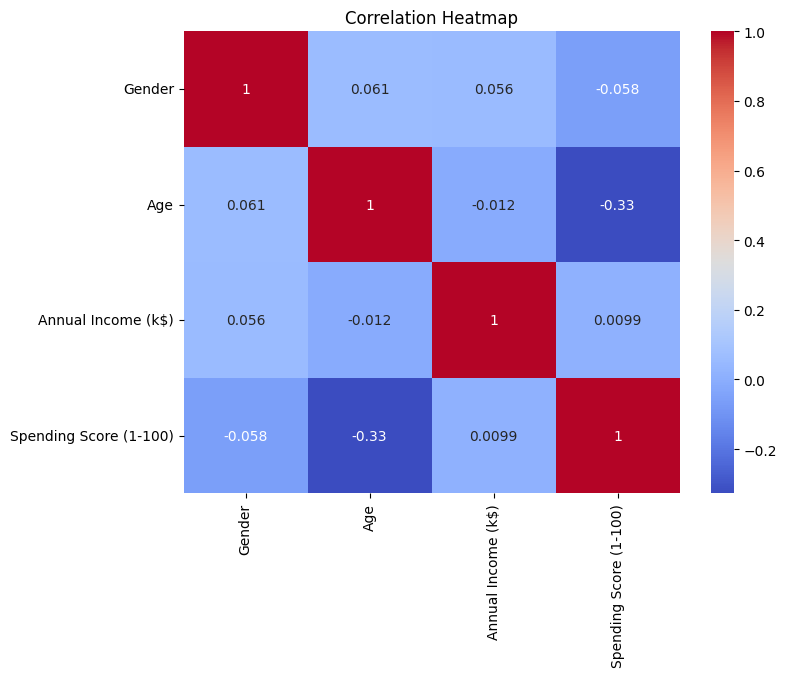

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

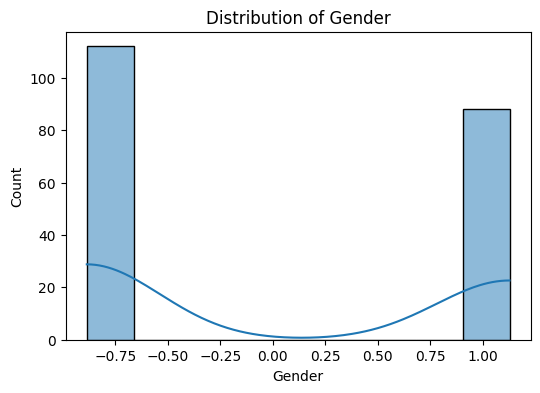

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Gender'], kde=True)
plt.title("Distribution of Gender")
plt.show()


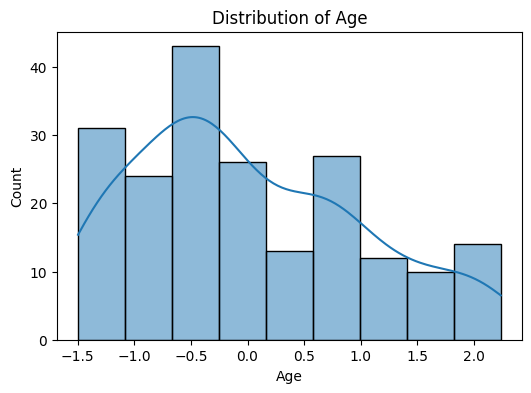

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")
plt.show()


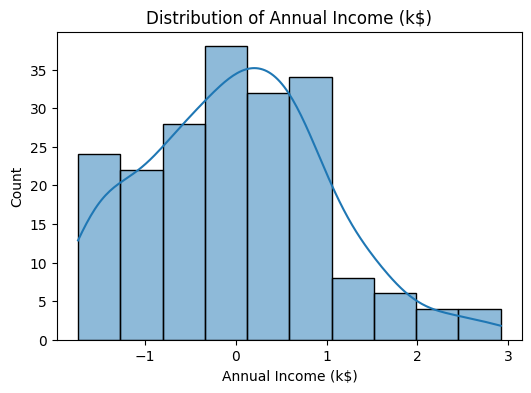

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Distribution of Annual Income (k$)")
plt.show()


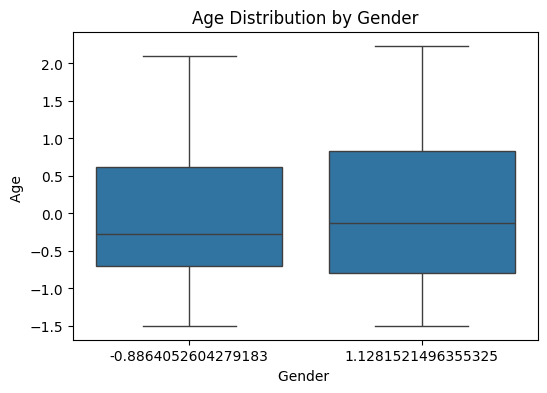

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender',y='Age',data=df)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender ")
plt.ylabel("Age ")
plt.show()

In [ ]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

#**APPLY K-MEANS CLUSTERING**

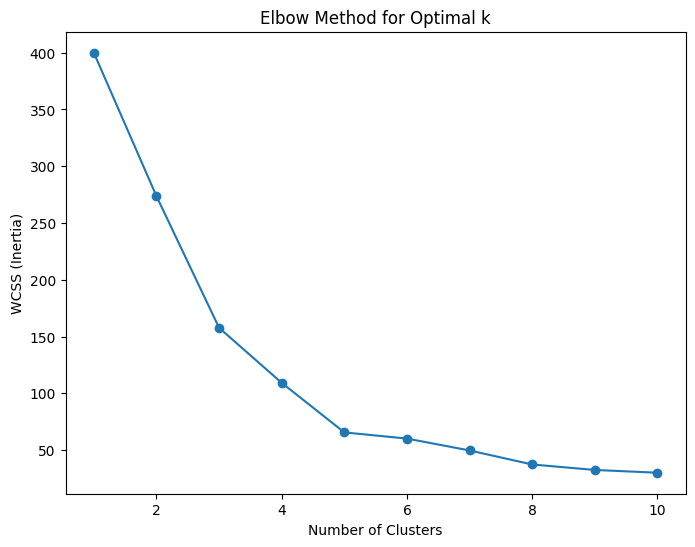

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)


plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [ ]:
K=7

kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)
print(df.head())


     Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  1.128152 -1.424569           -1.738999               -0.434801        2
1  1.128152 -1.281035           -1.738999                1.195704        2
2 -0.886405 -1.352802           -1.700830               -1.715913        2
3 -0.886405 -1.137502           -1.700830                1.040418        2
4 -0.886405 -0.563369           -1.662660               -0.395980        2


In [ ]:
df['Cluster'].unique()

array([2, 1, 0], dtype=int32)

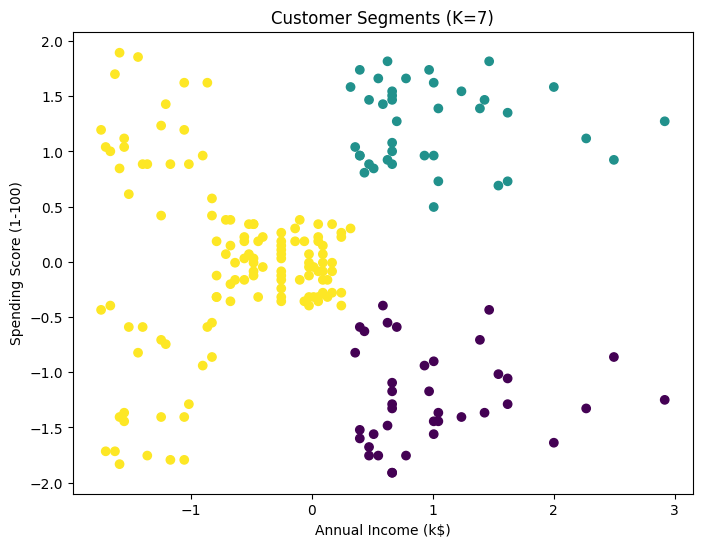

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
            c=df['Cluster'])
plt.title('Customer Segments (K=7)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()


#scatter plots with cluster coloring

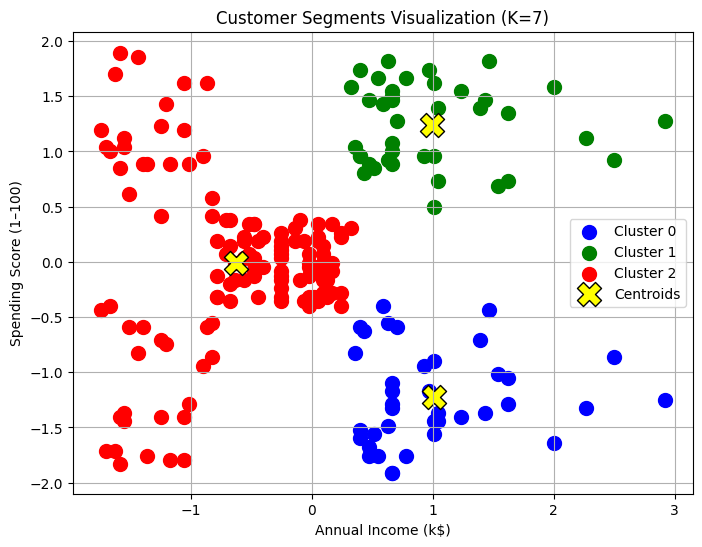

In [ ]:
import matplotlib.pyplot as plt


x_array = x.values
y_predict = kmeans.predict(x)


plt.figure(figsize=(8, 6))
plt.scatter(x_array[y_predict == 0, 0], x_array[y_predict == 0, 1], s=100, c='blue', label='Cluster 0')
plt.scatter(x_array[y_predict == 1, 0], x_array[y_predict == 1, 1], s=100, c='green', label='Cluster 1')
plt.scatter(x_array[y_predict == 2, 0], x_array[y_predict == 2, 1], s=100, c='red', label='Cluster 2')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X', edgecolor='black')

plt.title('Customer Segments Visualization (K=7)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
           Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                
0        0.173888  0.110861            1.009200               -1.225535
1        0.043390 -0.441917            0.991583                1.239503
2       -0.067479  0.105870           -0.626190               -0.014392


In [ ]:

cluster_centers_scaled = df.groupby('Cluster').mean().values


original_centers = sc.inverse_transform(cluster_centers_scaled)


original_columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


original_df = pd.DataFrame(original_centers, columns=original_columns)


print("Cluster Centers in Original Values:")
print(original_df)


Cluster Centers in Original Values:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.526316  40.394737           87.000000               18.631579
1  0.461538  32.692308           86.538462               82.128205
2  0.406504  40.325203           44.154472               49.829268


#business insights from segmentation

In [ ]:
cluster_df = pd.DataFrame(original_df)
cluster_df.index.name = 'Cluster'

In [ ]:
def generate_insight(row):
    if row['Spending Score (1-100)'] < 30 and row['Annual Income (k$)'] > 70:
        return "High-income, low-spending customers. Target with premium promotions or engagement campaigns."
    elif row['Spending Score (1-100)'] > 70 and row['Annual Income (k$)'] > 70:
        return "High-income, high-spending segment. Focus on loyalty, exclusivity, and premium offers."
    elif row['Annual Income (k$)'] < 50 and 40 < row['Age'] < 45:
        return "Mid-age, mid-income, moderate spenders. Encourage purchases with value-based offers."
    else:
        return "General group - tailor promotions based on specific preferences."

cluster_df['Business Insight'] = cluster_df.apply(generate_insight, axis=1)

print(cluster_df)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.526316  40.394737           87.000000               18.631579   
1        0.461538  32.692308           86.538462               82.128205   
2        0.406504  40.325203           44.154472               49.829268   

                                          Business Insight  
Cluster                                                     
0        High-income, low-spending customers. Target wi...  
1        High-income, high-spending segment. Focus on l...  
2        Mid-age, mid-income, moderate spenders. Encour...  
